# Diffusive landscape evolution model

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from ipywidgets import interactive
from IPython.display import Audio, display
plt.rcParams['figure.figsize'] = [16., 12.]
plt.rcParams['font.size'] = 16

In [36]:
# Define model and diffusion parameters:
nt = 200
L = 1.
nx = 100
dx = L/nx
kappa = 1E-6
dt = dx**2 / (4 * kappa)
xvals = np.linspace(0,L,nx)
u_max = 10.
sigma = 0.05
offset = 0.5
dt, dx

(25.000000000000004, 0.01)

## Define initial function

In [37]:
u_init = np.random.uniform(size=nx)

In [38]:
# initial peak
# u_init = u_max * np.exp(-((xvals-0.5) / sigma)**2)

In [39]:
def explicit_iteration(u, beta):
    """Perform one iteration of the explicit algorithm"""
    u_kp1 = u[:]
    u_kp1[1:-1] = beta * u[0:-2] + (1 - 2 * beta) * u[1:-1] + beta * u[2:]
     

In [40]:
def diff_problem(beta=0.15, nt=1, plot=True):
    # to generate the figure:
    u = u_init.copy()
    for i in range(nt):
        explicit_iteration(u, beta)
        # Trick to plot only every 10th iteration:
        if plot:
            if np.mod(i,200/10.) == 0: 
                plt.plot(xvals, u, color=plt.cm.copper_r(i/nt), lw=2)
    if plot: plt.show()

In [41]:
v = interactive(diff_problem, beta=(0.1,0.8,0.025), nt=(20,800,10))
display(v)

A Jupyter Widget

**Q (and fun fact): what else can the Laplace operator be used for?**

## Using a DEM model

Steps: 

- pick points in GoogleEarth
- extract elevation and concert to txt file: 

https://www.gpsvisualizer.com/convert_input?form=elevation&units=metric&form:add_elevation=auto

In [15]:
# load DTM data from file
dtm = np.loadtxt("./elevation_1.txt", skiprows=1, usecols=(1,2,3))

In [19]:
dtm.shape

(107, 3)

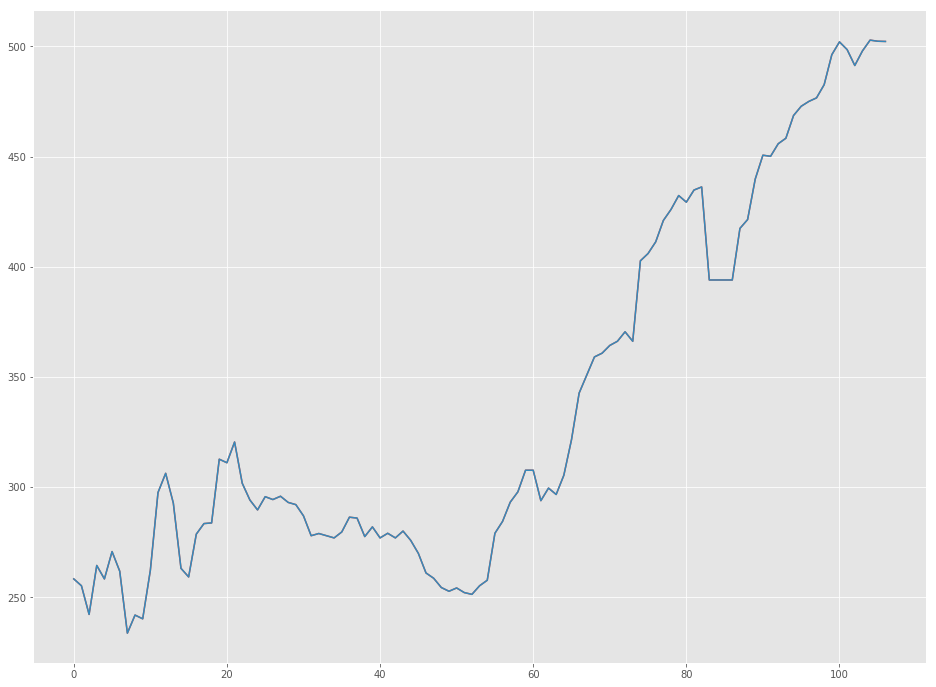

In [24]:
plt.plot(dtm[:,2])
plt.show()

In [31]:
u_init = dtm[:100,2]

In [34]:
v = interactive(diff_problem, beta=(0.1,0.8,0.025), nt=(20,800,10))
display(v)

A Jupyter Widget